In [1]:
!pip install yfinance

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

# **Question 1:**

In [3]:
data=yf.download(tickers=['AAPL'],period='1y')

[*********************100%***********************]  1 of 1 completed


In [4]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2023-12-14,197.144196,198.110001,199.619995,196.160004,198.020004,66831600
2023-12-15,196.606827,197.570007,198.399994,197.000000,197.529999,128256700
2023-12-18,194.934998,195.889999,196.630005,194.389999,196.089996,55751900
2023-12-19,195.979889,196.940002,196.949997,195.889999,196.160004,40714100
2023-12-20,193.880188,194.830002,197.679993,194.830002,196.899994,52242800


**Plot of the data**

This plot shows that the price was falling(downwards trend) during the start of the year, it reached a minima around April-end,2024 and then rose up(upwards trend) again. It is now at its maximum in the past year.

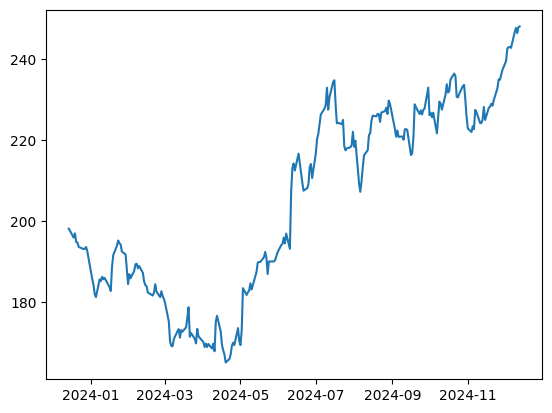

In [5]:
plt.plot(data['Close'])

# **Question 2:**

In [6]:
def fetch(ticker):
    data=yf.download(tickers=ticker,period='6mo')
    return data

In [8]:
data=fetch(['AAPL','MSFT','GOOGL'])

[*********************100%***********************]  3 of 3 completed


In [9]:
data.head()

Price        Adj Close                               Close              \
Ticker            AAPL       GOOGL        MSFT        AAPL       GOOGL   
Date                                                                     
2024-06-14  212.011078  176.353592  440.891235  212.490005  176.789993   
2024-06-17  216.181656  176.802490  446.669220  216.669998  177.240005   
2024-06-18  213.807007  174.657806  444.646942  214.289993  175.089996   
2024-06-20  209.207397  175.864822  444.009369  209.679993  176.300003   
2024-06-21  207.022354  179.186600  448.073883  207.490005  179.630005   

Price                         High                                 Low  \
Ticker            MSFT        AAPL       GOOGL        MSFT        AAPL   
Date                                                                     
2024-06-14  442.570007  215.169998  177.059998  443.140015  211.300003   
2024-06-17  448.369995  218.949997  178.360001  450.940002  212.720001   
2024-06-18  446.339996  218.630005  177.389999  450.140015  213.000000   
2024-06-20  445.700012  214.240005  177.289993  446.529999  208.850006   
2024-06-21  449.779999  211.889999  180.850006  450.579987  207.110001   

Price                                     Open                          \
Ticker           GOOGL        MSFT        AAPL       GOOGL        MSFT   
Date                                                                     
2024-06-14  174.149994  436.720001  213.850006  174.220001  438.279999   
2024-06-17  174.809998  440.720001  213.369995  175.460007  442.589996   
2024-06-18  174.100006  444.890015  217.589996  177.139999  449.709991   
2024-06-20  174.990005  441.269989  213.929993  175.369995  446.299988   
2024-06-21  176.610001  446.510010  210.389999  177.000000  447.380005   

Price          Volume                      
Ticker           AAPL     GOOGL      MSFT  
Date                                       
2024-06-14   70122700  18063600  13582000  
2024-06-17   93728300  19618500  20790000  
2024-06-18   79943300  21869900  17112500  
2024-06-20   86172500  20160100  19877400  
2024-06-21  246421400  58582700  34486200

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127 entries, 2024-06-14 to 2024-12-13
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, AAPL)   127 non-null    float64
 1   (Adj Close, GOOGL)  127 non-null    float64
 2   (Adj Close, MSFT)   127 non-null    float64
 3   (Close, AAPL)       127 non-null    float64
 4   (Close, GOOGL)      127 non-null    float64
 5   (Close, MSFT)       127 non-null    float64
 6   (High, AAPL)        127 non-null    float64
 7   (High, GOOGL)       127 non-null    float64
 8   (High, MSFT)        127 non-null    float64
 9   (Low, AAPL)         127 non-null    float64
 10  (Low, GOOGL)        127 non-null    float64
 11  (Low, MSFT)         127 non-null    float64
 12  (Open, AAPL)        127 non-null    float64
 13  (Open, GOOGL)       127 non-null    float64
 14  (Open, MSFT)        127 non-null    float64
 15  (Volume, AAPL)      127 non-null    in

In [17]:
w=[0.33,0.33,0.33]
daily_returns=data['Adj Close'].pct_change(1)[1:]
weighted_ret=w*daily_returns
portfolio_returns=weighted_ret.sum(axis=1)
final_values=(1+portfolio_returns).cumprod()*10000

**Graph of portfolio returns over time**

The weights are equally divided between the 3 stocks. Daily returns gets the change between the closing price of 2 consecutive days. They are then multiplied with the weights for the wighted returns. Portfolio returns(final_values) is calculated using **Σw.DailyReturns**

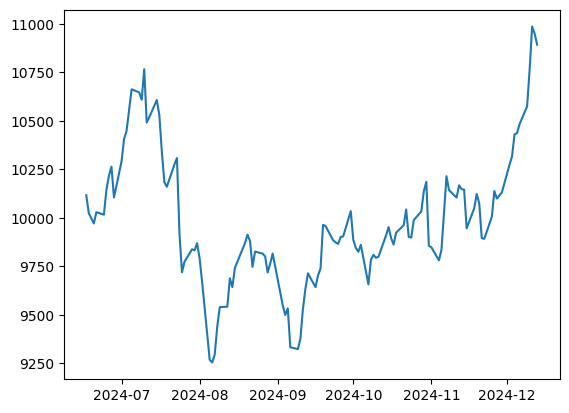

In [14]:
plt.plot(final_values)

**Total Value of the portfolio at the end of 6-months**

In [16]:
value_end=final_values.iloc[-1]
print(value_end)

10892.300033125843


# **Question 3:**

In [18]:
def analyze_portfolio(tickers,weights,start_date,end_date):
    data=yf.download(tickers=tickers,start=start_date,end=end_date)
    closing=data['Adj Close']
    daily_ret=closing.pct_change(1)[1:]
    weighted_ret=daily_ret*weights
    portfolio_ret=weighted_ret.sum(axis=1)
    final_value=(1+portfolio_ret).cumprod()*100000
    return final_value.iloc[-1]

**Sample Input**

In [20]:
val= analyze_portfolio(
 tickers=['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'NVDA'],
 weights=[0.3, 0.2, 0.2, 0.2, 0.1],
 start_date='2023-01-01',
 end_date='2023-12-31'
 )

[*********************100%***********************]  5 of 5 completed


**Final Value at the end of the sample period**

In [21]:
val

195989.03704280083

# **Bonus Part:**

The second portfolio has given a higher weightage to Tesla while the first portfolio has given equal weightage to all the stocks. This shows that in 2023, the stock of Tesla has gone up significantly in price. That is why Portfolio 2 has given better returns than Portfolio 1.

[*********************100%***********************]  5 of 5 completed


Text(0, 0.5, 'Final Value')

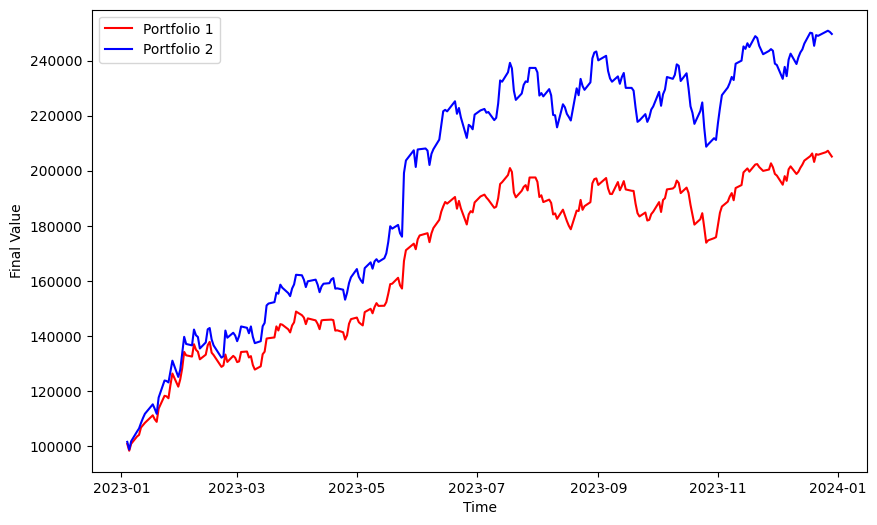

In [24]:
tickers=['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'NVDA']

weights_1=[0.2, 0.2, 0.2, 0.2, 0.2]       #portfolio 1
weights_2=[0.1,0.2,0.1,0.5,0.1]           #portfolio 2

start_date='2023-01-01'
end_date='2023-12-31'

data=yf.download(tickers=tickers,start=start_date,end=end_date)

closing=data['Adj Close']
daily_ret=closing.pct_change(1)[1:]

#calculation of final returns for both portfolios
weighted_ret_1=daily_ret*weights_1
portfolio_ret_1=weighted_ret_1.sum(axis=1)
final_values_1=(1+portfolio_ret_1).cumprod()*100000
weighted_ret_2=daily_ret*weights_2
portfolio_ret_2=weighted_ret_2.sum(axis=1)
final_values_2=(1+portfolio_ret_2).cumprod()*100000

#plotting both portfolios
plt.figure(figsize=(10,6))
plt.plot(final_values_1,color='red')
plt.plot(final_values_2,color='blue')
plt.legend(['Portfolio 1','Portfolio 2'])
plt.xlabel('Time')
plt.ylabel('Final Value')